##Iteration 2 - Improvement using batch size and epochs

* We built a vanilla model in the first iteration to achieve accuracy of 99.0

* Here, we will first increase batch size to see if any improvement happens in accuracy

* Using the same batch size, we will then increase epochs to see if there is an improvement in accuracy

* _Accuracy achieved with higher batch size: 98.54_ - **_DECREASED_**

* _Increasing epochs with higher batch size: 99.09

###HIGHEST ACCURACY ACHIEVED:  99.09

### **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

from keras.datasets import mnist

Using TensorFlow backend.


### Load pre-shuffled MNIST data & inspect a few images

(60000, 28, 28)


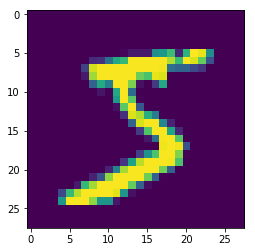

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

###Modify loaded data to match with the shape of form of an input required by a keras model

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

###Build the network

In [4]:
from keras.layers import Activation
model = Sequential()

#Convolution Block 1
model.add(Convolution2D(8, 3, activation='relu', input_shape=(28,28,1)))     #Receptive Field:  3;   Input Channels:  3;  Resol:  26
model.add(Convolution2D(8, 3, activation='relu'))                           #Receptive Field:  5;   Input Channels:  8;  Resol:  24
model.add(Convolution2D(28, 3, activation='relu'))                           #Receptive Field:  7;   Input Channels: 8;  Resol:  22

#Transition Block 1
model.add(Convolution2D(32, 1, activation='relu'))                           #Receptive Field:  7;   Input Channels: 28;  Resol:  22
model.add(MaxPooling2D(2,2))                                                    #Receptive Field: 14;   Input Channels: 32;  Resol:  11

#Convolution Block 2
model.add(Convolution2D(8, 3, activation='relu'))                            #Receptive Field: 16;   Input Channels: 32;  Resol:  9
model.add(Convolution2D(8, 3, activation='relu'))                           #Receptive Field: 18;   Input Channels:  8;  Resol:  7
model.add(Convolution2D(28, 3, activation='relu'))                           #Receptive Field: 20;   Input Channels: 8;  Resol:  5

#Final Layer
model.add(Convolution2D(10, 3, activation='relu'))                              #Receptive Field: 24;   Input Channels: 28;  Resol:  3
model.add(Convolution2D(10, 3))                                                 #Receptive Field: 28;   Input Channels: 10;  Resol:  1
model.add(Flatten())
model.add(Activation('softmax'))

#MODEL ARCHITECTURE SUMMARY
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 8)         584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 28)        2044      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        928       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 8)           2312      
_________________________________________________________________
conv

###Provide parameters on which the model will train

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

###Start training the model, save the model with best val accuracy

In [11]:
checkpointfilepath = "eva_assignment4_iteration2.hdf5"
checkpoint = ModelCheckpoint(checkpointfilepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 61us/step - loss: 0.0500 - acc: 0.9851 - val_loss: 0.0484 - val_acc: 0.9849

Epoch 00001: val_acc improved from -inf to 0.98490, saving model to eva_assignment4_iteration2.hdf5
Epoch 2/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.0472 - acc: 0.9855 - val_loss: 0.0465 - val_acc: 0.9855

Epoch 00002: val_acc improved from 0.98490 to 0.98550, saving model to eva_assignment4_iteration2.hdf5
Epoch 3/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.0444 - acc: 0.9861 - val_loss: 0.0490 - val_acc: 0.9854

Epoch 00003: val_acc did not improve from 0.98550
Epoch 4/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.0424 - acc: 0.9870 - val_loss: 0.0431 - val_acc: 0.9863

Epoch 00004: val_acc improved from 0.98550 to 0.98630, saving model to eva_assignment4_iteration2.hdf5
Epoch 5/30
60000/60000 [==================

###Check model accuracy

In [7]:
model.load_weights(checkpointfilepath)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.04456964286561124, 0.9854]


In [8]:
#CHECK A FEW MISCLASSIFIED IMAGES:
y_pred = model.predict(X_test)
y_pred.shape

(10000, 10)

###Visualize what the filters in a particular layer extract

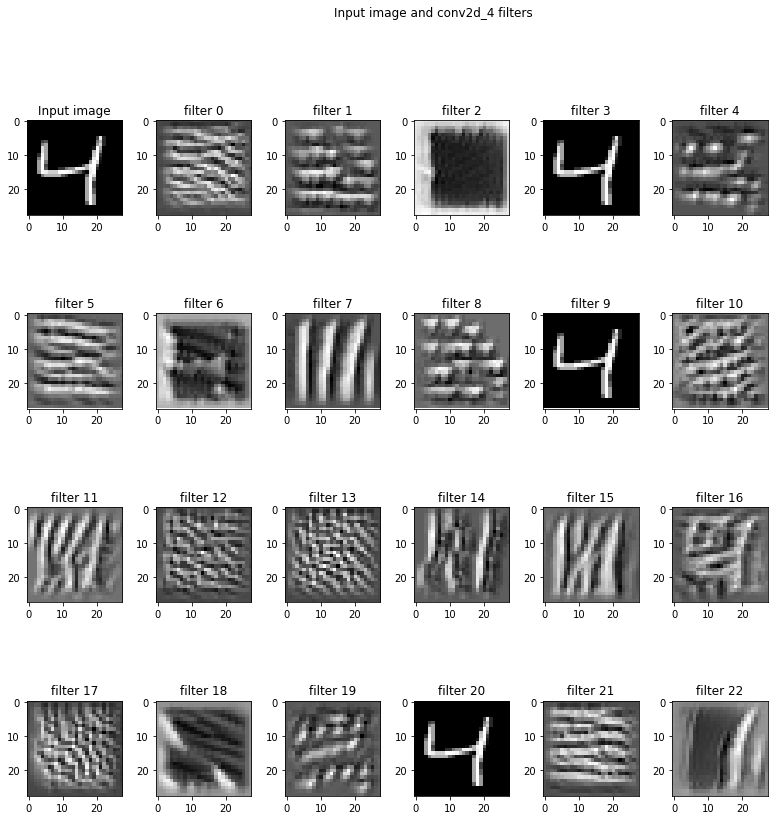

In [9]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

In [0]:
#CHECK A FEW MISCLASSIFIED IMAGES: